In [40]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
%matplotlib inline

In [41]:
def masses(x):
    # for input array of time values, approximate M_star (in M_sol) at those times in its life
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.132e10):
            y[i] = 1
        elif (1.132e10 < time <= 1.1336e10):
            y[i] = 0.05 * (708.5 - time/(1.6e7))**(1/3) + .95
        elif (1.1336e10 < time <= 1.1463e10):
            y[i] =  -8**((time - 1.1463e10)/574511)/2.4 + .95
        elif (1.1463e10 < time):
            y[i] = 0.54
    return y

def lums_array(x):
    # for input array of time values, approximate log(L_star) (in log(L_sol)) at those times
    y = np.zeros_like(x)
    for i, time in enumerate(x):
        if (time <= 1.113e10):
            y[i] = 1.05
        elif (1.113e10 < time <= 1.1225e10):
            y[i] = 1.45 + ((1.45 - 1.1)/(1.1225e10 - 1.1135e10))*(time - 1.1225e10)
        elif (1.1225e10 < time <= 1.125e10):
            y[i] = 1.45
        elif (1.125 < time <= 1.1336e10):
            y[i] = 1.35 + .1*1.002**((time - 1.125e10)/58000)
        elif (1.1336e10 < time <= 1.142e10):
            y[i] = 1.673
        elif (1.142e10 < time <= 1.14397e10):
            y[i] = 3.198e-9*time - 34.85
        elif (1.14397e10 < time <= 1.14479e10):
            y[i] = 1.736 + 0.032*1.5**((time - 1.14455e10)/360000)
        elif (1.14479e10 < time <= 1.1462e10):
            y[i] = 2.15 + 0.00021*1.5**((time - 1.1444e10)/870000)
        elif (1.1462e10 < time <= 1.14632e10):
            y[i] = 3.5 + (.43/0.0001e10)*(time - 1.1463e10)
        elif (1.14632e10 < time <= 1.14636e10):
            y[i] = 2.3*((time - 1.1463e10)/45000)**(-0.3)
        elif (1.14636e10 < time <= 1.14654715e10):
            y[i] = .2 + ((.2 - 1.05)/(1.14654715e10 - 1.14636e10))*(time - 1.14654715e10)
        elif (1.14654715e10 < time):
            y[i] = .2
    return y        
        
def inst_lum(x):
    # for a single time input, output log(L_star) (in log(L_sol)) at that time
    time = x
    if (time <= 1.113e10):
        y = 1.05
    elif (1.113e10 < time <= 1.1225e10):
        y = 1.45 + ((1.45 - 1.1)/(1.1225e10 - 1.1135e10))*(time - 1.1225e10)
    elif (1.1225e10 < time <= 1.125e10):
        y = 1.45
    elif (1.125 < time <= 1.1336e10):
        y = 1.35 + .1*1.002**((time - 1.125e10)/58000)
    elif (1.1336e10 < time <= 1.142e10):
        y = 1.673
    elif (1.142e10 < time <= 1.14397e10):
        y = 3.198e-9*time - 34.85
    elif (1.14397e10 < time <= 1.14479e10):
        y = 1.736 + 0.032*1.5**((time - 1.14455e10)/360000)
    elif (1.14479e10 < time <= 1.1462e10):
        y = 2.15 + 0.00021*1.5**((time - 1.1444e10)/870000)
    elif (1.1462e10 < time <= 1.14632e10):
        y = 3.5 + (.43/0.0001e10)*(time - 1.1463e10)
    elif (1.14632e10 < time <= 1.14636e10):
        y = 2.3*((time - 1.1463e10)/45000)**(-0.3)
    elif (1.14636e10 < time <= 1.14654715e10):
        y = .2 + ((.2 - 1.05)/(1.14654715e10 - 1.14636e10))*(time - 1.14654715e10)
    elif (1.14654715e10 < time):
        y = .2
    return y

In [42]:
######################
# Get an array of masses and luminosities over the period of interest.
# This cell also plots those masses and luminosities.
######################

N_times = 10000
T0 = 1.14625e10
t_tot = 750000

ts = np.linspace(0, t_tot, N_times)
mtimes = masses(ts + T0)
lumins = lums_array(ts + T0)

In [43]:
def a_calc(a_start, mass):
    a_new = a_start*(1/mass)
    return a_new

def tau_yark(a, r_ast, lums, mass):
    c = 63197.8 # speed of light in au/yr
    D = 2*r_ast*u.km
    D = D.to(u.au)
    D /= u.au
    p = np.random.normal(3,.01,1)*u.g/(u.cm**3)
    p = p.to(u.solMass/(u.au**3))
    p *= (u.au**3)/u.solMass
    
    A = 3/(4*np.pi) * 1/(D*p) * 1/(c*np.sqrt(G))
    B = 10**lums/np.sqrt(a**3 * mass)
    
    tau = A*B
    return tau**(-1)

def tau_mlss(a, mass):
    tau = 1/(a*mass)
    return tau**(-1)

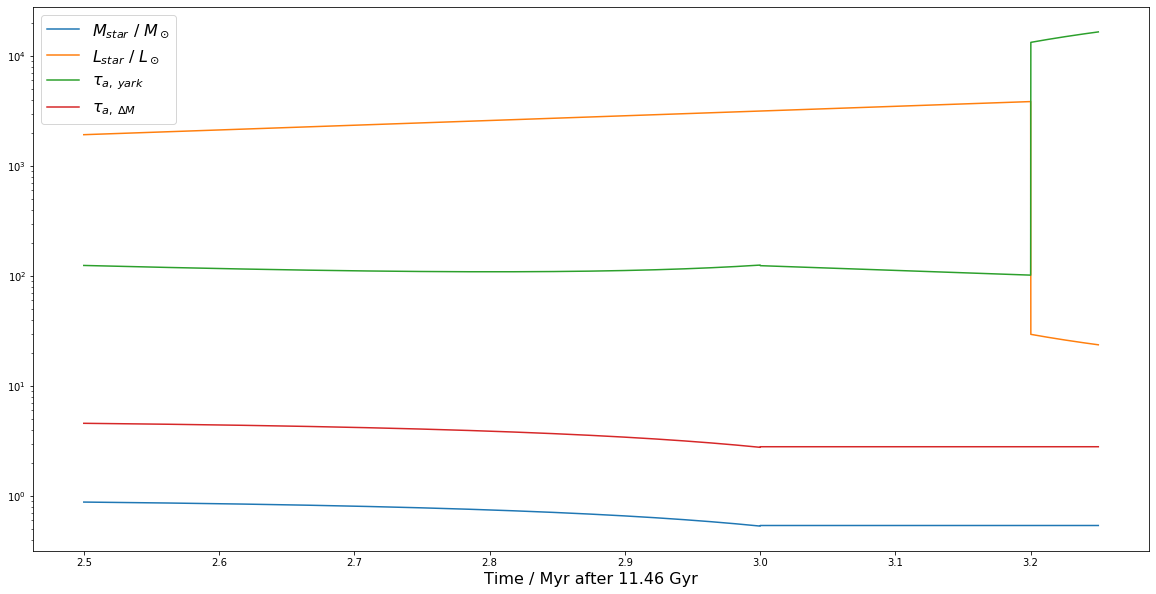

In [51]:
G = 1

a_vals = a_calc(5.2,mtimes)
tau_ya = tau_yark(a_vals,1,lumins,mtimes)
tau_ml = tau_mlss(5.2,mtimes)

fig, ax = plt.subplots(figsize=(20,10))

time = (ts + T0)/1e6 - 1.146e4
ax.plot(time, mtimes)
ax.plot(time, 10**lumins)
ax.plot(time, tau_ya)
ax.plot(time, tau_ml)
ax.legend([r"$M_{star}$ / $M_\odot$", r"$L_{star}$ / $L_\odot$", r"$\tau_{a,\;yark}$", r"$\tau_{a,\;\Delta M}$"], fontsize=16, loc='upper left')
ax.set_xlabel("Time / Myr after 11.46 Gyr", fontsize=16)
ax.set_yscale("log")
fig.show()
fig.savefig("timescales-1.png", dpi=300)